In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

## common variable:
train_label_df:all train data labels  
train_prop_df:all train data attributes  
train_label_prop_df:all train data labels and attributes  

## Load Data

In [21]:
train_prop_df = pd.read_csv('../Data/properties_2016.csv')
train_label_df = pd.read_csv("../Data/train_2016_v2.csv", parse_dates=["transactiondate"])
train_label_prop_df = pd.merge(train_label_df, train_prop_df, on='parcelid', how='left')

2985217 rows × 58 columns, which means that there are 2985217 training points and each point has 58 properties.

## Analysis Label 

In [13]:
print("Total train data number is:", train_label_df.shape[0])
print(train_label_df.head())

Total train data number is: 90275
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


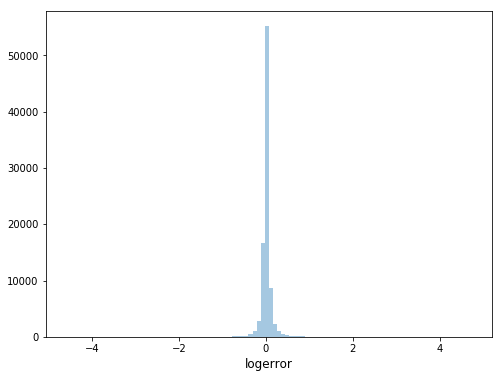

In [15]:
# Analysis log error -- label 
plt.figure(figsize=(8,6))
sns.distplot(train_label_df.logerror.values, bins=100, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

# From the below fig, we can see there is a normal distribution on the log error 

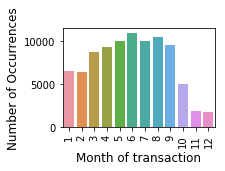

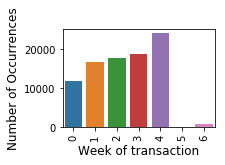

In [17]:
# Analysis trainsaction date
train_label_df['transaction_month'] = train_label_df['transactiondate'].dt.month
cnt_srs = train_label_df['transaction_month'].value_counts()
plt.subplot(2,2,1)
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

train_label_df['transaction_week'] = train_label_df['transactiondate'].dt.weekday
cnt_srs = train_label_df['transaction_week'].value_counts()
plt.subplot(2,2,3)
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Week of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

From the below figs, we can see that there is a significant difference in the number of occurrences. Besides, at the end of year and week, the number of occurrences is quite low.

In [19]:
# Analysis ID
(train_label_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

So most of the parcel ids are appearing only once in the dataset.

## Attributes meaning

In [24]:
pd.options.display.max_rows = 65

dtype_df = train_prop_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64      1
1     float64     52
2      object      5

## Attribute -- The ID of AC: 

In [7]:
train_prop_df['airconditioningtypeid'].value_counts()
# sum(data['airconditioningtypeid'].value_counts())

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: airconditioningtypeid, dtype: int64

Text(0,0.5,'Percent(%)')

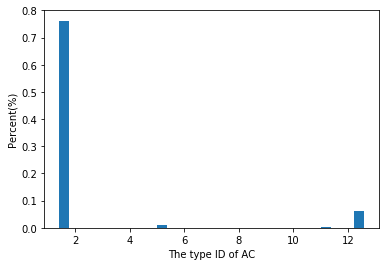

In [8]:
plt.hist(train_prop_df['airconditioningtypeid'].dropna(),density=True,rwidth=0.3) 
plt.xlabel('The type ID of AC')
plt.ylabel('Percent(%)')

So most un-Nan value of the type Id of AC is 1. According to the official document of interpretation(zillow_data_dictionary.xlsx), this is a type of AC.

## Analysis the Nan value:

In [5]:
nullnum=train_prop_df.isnull().sum()

In [6]:
print(nullnum)

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


Text(0.5,1,'The number of Nan of each property')

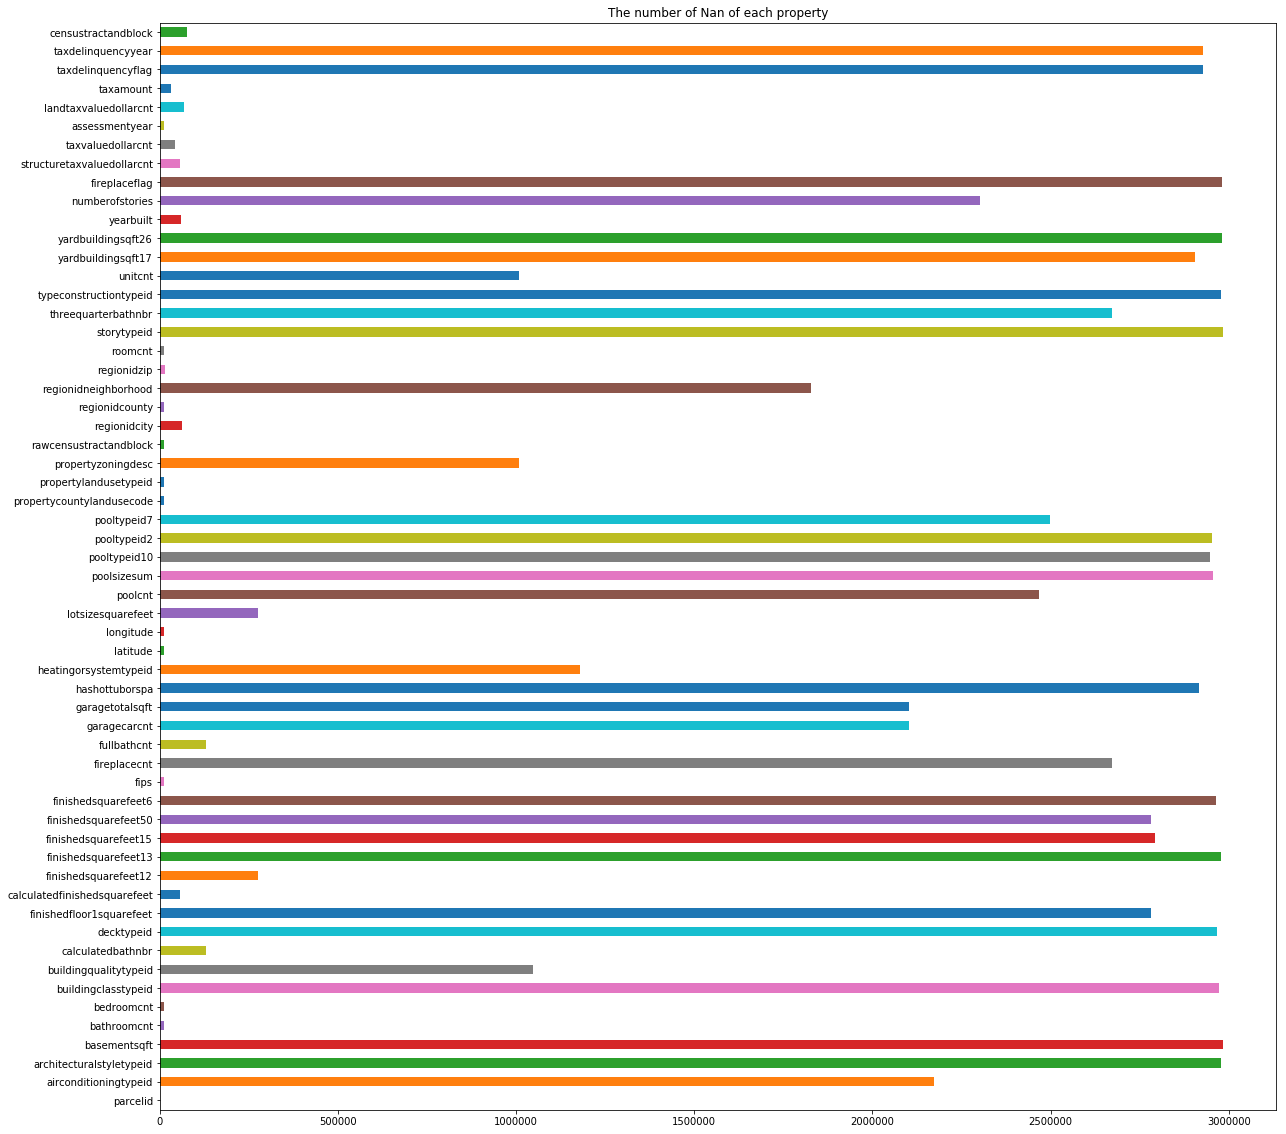

In [7]:
# Here shows the hist plot of number of Nan of each columns
nullnum.plot(kind='barh',figsize=[20,20])
plt.title('The number of Nan of each property')

In [8]:
# Here shows the sorted properties which are sorted by the number of Nan
nullnum.sort_values()

parcelid                              0
fips                              11437
propertylandusetypeid             11437
rawcensustractandblock            11437
regionidcounty                    11437
longitude                         11437
latitude                          11437
assessmentyear                    11439
bedroomcnt                        11450
bathroomcnt                       11462
roomcnt                           11475
propertycountylandusecode         12277
regionidzip                       13980
taxamount                         31250
taxvaluedollarcnt                 42550
structuretaxvaluedollarcnt        54982
calculatedfinishedsquarefeet      55565
yearbuilt                         59928
regionidcity                      62845
landtaxvaluedollarcnt             67733
censustractandblock               75126
fullbathcnt                      128912
calculatedbathnbr                128912
finishedsquarefeet12             276033
lotsizesquarefeet                276099


In [9]:
nullnumrow=train_prop_df.isnull().sum(axis=1)

In [10]:
nullnumrow

0          41
1          40
2          35
3          31
4          32
5          31
6          38
7          34
8          40
9          32
10         32
11         41
12         40
13         40
14         40
15         40
16         39
17         33
18         34
19         29
20         31
21         32
22         30
23         30
24         31
25         39
26         31
27         31
28         28
29         29
           ..
2985187    57
2985188    57
2985189    57
2985190    57
2985191    57
2985192    57
2985193    57
2985194    57
2985195    57
2985196    57
2985197    57
2985198    57
2985199    57
2985200    57
2985201    57
2985202    57
2985203    57
2985204    57
2985205    57
2985206    57
2985207    57
2985208    57
2985209    57
2985210    57
2985211    57
2985212    57
2985213    57
2985214    57
2985215    57
2985216    57
Length: 2985217, dtype: int64

Text(0.5,1,'The number of Nan of each points')

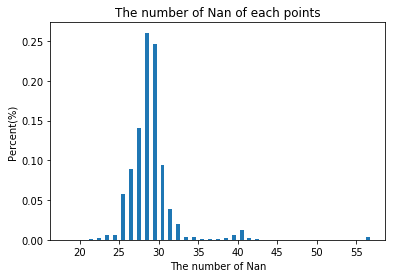

In [11]:
plt.hist(nullnumrow,bins=39,rwidth=0.5,density=True)
plt.xlabel('The number of Nan')
plt.ylabel('Percent(%)')
plt.title('The number of Nan of each points')

We can see that most points have 25 - 35 Nan, so we must handle the Nan properly.

# Coorelation Analysis

C:\Users\jieyang\Anaconda3\envs\py35\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\jieyang\Anaconda3\envs\py35\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


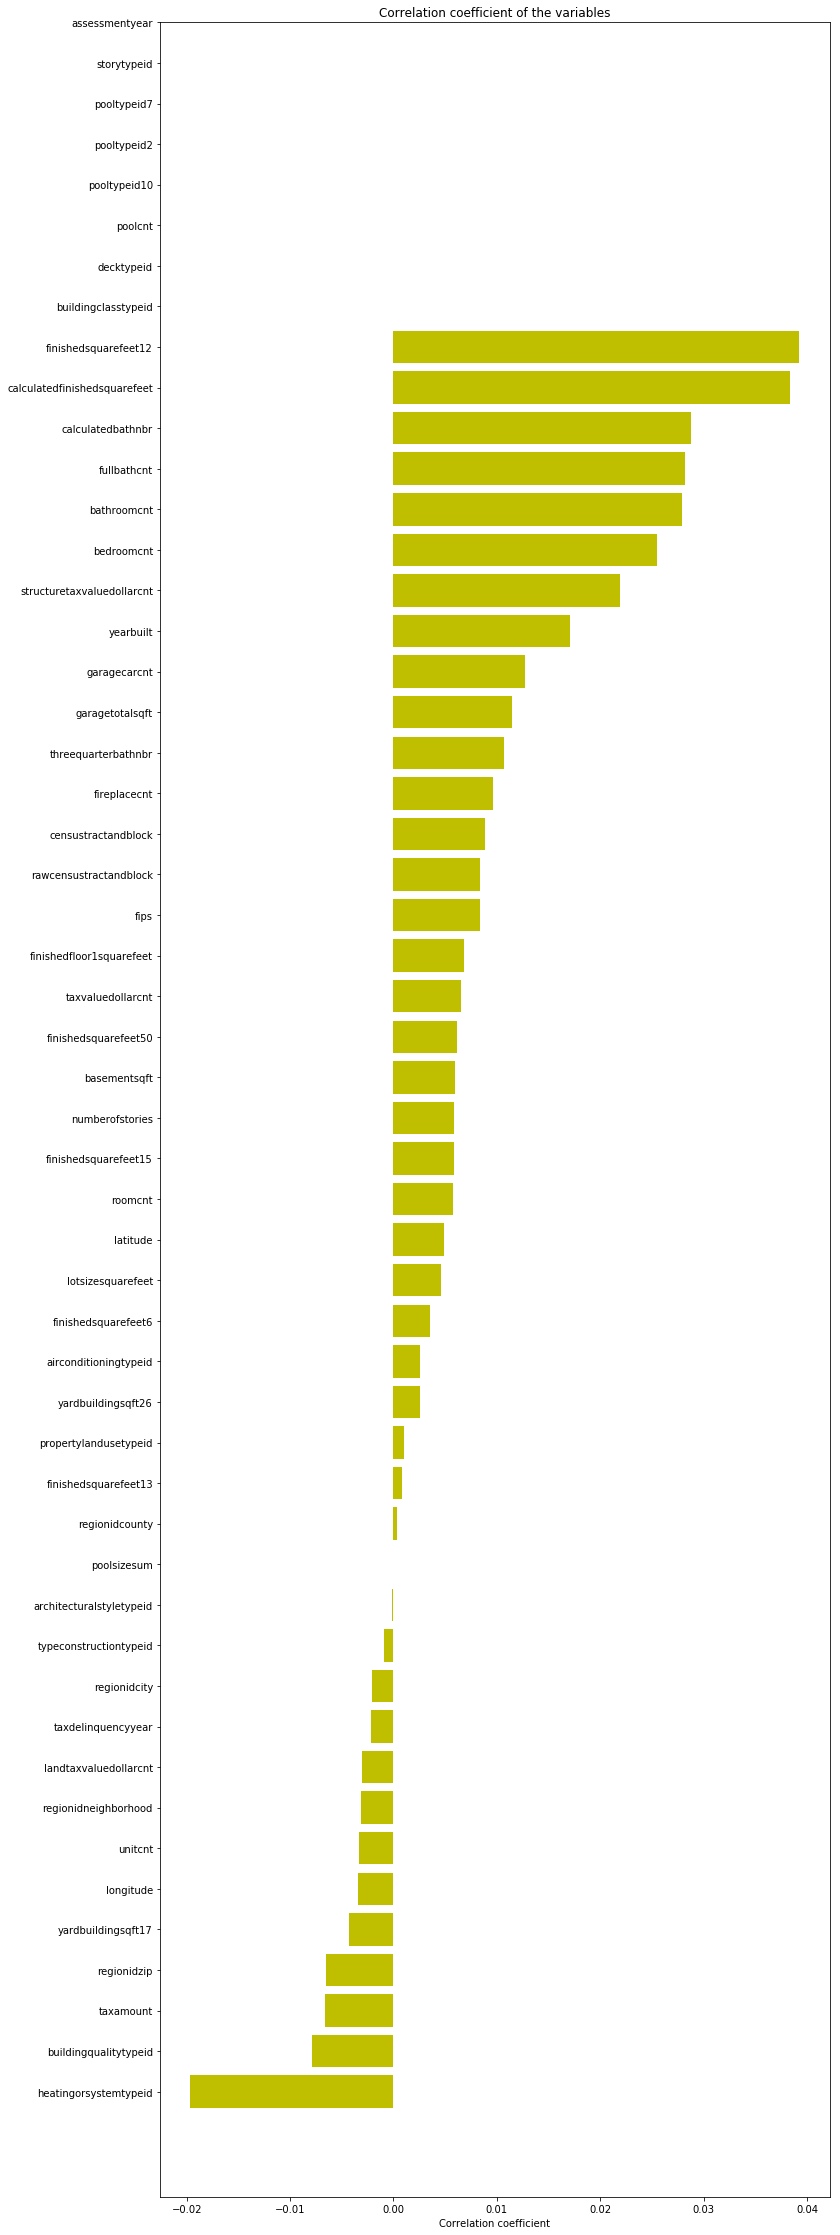

In [30]:
# impute the missing values with mean values to compute correlation coefficients #
train_label_prop_df.columns

mean_values = train_label_prop_df.mean(axis=0)
train_df_new = train_label_prop_df.fillna(mean_values, inplace=False)
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

From the above fig, we can see that some features are positively coorealted with label and others are negatively coorelated with label